In [1]:
# import libraries
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# veri seti yükleme: breast cancer
data = load_breast_cancer()
X = data.data
y = data.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# LGBM modeli tanımlama
lgbm_clf = LGBMClassifier(
    n_estimators=200,         # toplam ağaç sayısı
    learning_rate=0.04,       # öğrenme oranı
    max_depth=5,              # maksimum ağaç derinliği
    subsample=0.8,            # her ağacı eğitirken kullanılan veri oranı
    colsample_bytree=0.8,     # her ağacı eğitirken kullanılan feature oranı
    reg_alpha=0.1,            # L1 cezası
    reg_lambda=0.2,           # L2 cezası
    min_child_samples=20,     # bir yaprağın bölünebilmesi için min örnek sayısı
    min_split_gain=0.01,      # bir bölünmenin minimum kazanç eşiği
    class_weight="balanced",  # dengesiz sınıflar için otomatik ağırlık
    boosting_type="gbdt",     # gradient boosting decision tree
    random_state=42
)


In [4]:
# training
lgbm_clf.fit(X_train, y_train)

# testing
y_pred = lgbm_clf.predict(X_test)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds

Accuracy: 0.9590643274853801
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        62
           1       0.97      0.96      0.97       109

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



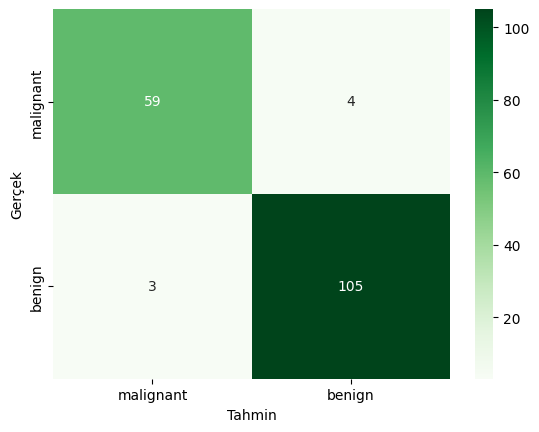

In [5]:
# evaluation: accuracy, classification report, confusion matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_pred, y_test)}")

cm = confusion_matrix(y_test, y_pred)

# confusion matrix görselleştirme
plt.figure()
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()
